# Objective

Replicate the [notebook](https://nipunbatra.github.io/ml-teaching/notebooks/names.html) on the next character prediction and use it for generation of text. Use one of the datasets specified below for training. Refer to Andrej Karpathy’s blog post on Effectiveness of RNNs. Visualise the embeddings using t-SNE if using more than 2 dimensions or using a scatter plot if using 2 dimensions. Write a streamlit application which asks users for an input text and it then predicts next k characters.

Datasets (first few based on Effectiveness of RNN blog post from Karpathy et al.)
- Paul Graham essays
- Wikipedia (English)
- Shakespeare
- Maths texbook
- Something comparable in spirit but of your choice (do confirm with TA Ayush)


In [ ]:
import torch
import torch.nn.functional as F
from torch import nn
import pandas as pd
import matplotlib.pyplot as plt # for making figures
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from pprint import pprint

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
class NextChar(nn.Module):
  def __init__(self, block_size, vocab_size, emb_dim, hidden_size):
    super().__init__()
    self.emb = nn.Embedding(vocab_size, emb_dim)
    self.lin1 = nn.Linear(block_size * emb_dim, hidden_size)
    self.lin2 = nn.Linear(hidden_size, vocab_size)

  def forward(self, x):
    x = self.emb(x)
    x = x.view(x.shape[0], -1)
    x = torch.sin(self.lin1(x))
    x = self.lin2(x)
    return x


In [ ]:
import torch._dynamo
torch._dynamo.config.suppress_errors = True


# Function to preprocess the text data
def preprocess_text(text):
    # Convert characters to ASCII values
    ascii_values = [ord(char) for char in text]
    return ascii_values

# Function to create training sequences
def create_sequences(text, seq_length):
    sequences = []
    for i in range(len(text) - seq_length-1):
        seq = text[i:i+seq_length+1]
        sequences.append(seq)
    return sequences

# Function to generate X and y for training
def generate_train_data(sequences):
    X = []
    y = []
    for seq in sequences:
        X.append(seq[:-1])
        y.append(seq[-1])
    return np.array(X), np.array(y)

class NextChar1(nn.Module):
  def __init__(self, block_size, vocab_size, emb_dim, hidden_size):
    super().__init__()
    self.emb = nn.Embedding(vocab_size, emb_dim)
    self.lin1 = nn.Linear(block_size * emb_dim, hidden_size)
    self.lin2 = nn.Linear(hidden_size, vocab_size)

  def forward(self, x):
    x = self.emb(x)
    x = x.view(x.shape[0], -1)
    x = torch.sin(self.lin1(x))
    x = self.lin2(x)
    return x
# Function to build and train the model
def build_and_train_model(X_train, y_train, vocab_size, block_size, emb_dim=2):
    model = NextChar1(block_size, vocab_size, emb_dim, 500).to(device)
    model = torch.compile(model)
    loss_fn = nn.CrossEntropyLoss()
    opt = torch.optim.AdamW(model.parameters(), lr=0.003)
    # Mini-batch training
    batch_size = 4096
    print_every = 10
    for epoch in range(100):
        for i in range(0, X_train.shape[0], batch_size):
            x = X_train[i:i+batch_size]
            y = y_train[i:i+batch_size]
            y_pred = model(x)
            loss = loss_fn(y_pred, y)
            loss.backward()
            opt.step()
            opt.zero_grad()
        if epoch % print_every == 0:
            print(epoch, loss.item())
    return model

# Function to predict next k characters




    # Load and preprocess training data
with open('input.txt', 'r') as file:
    training_text = file.read()
training_text = preprocess_text(training_text)

# Define sequence length and create sequences
block_size = 10  # You can adjust this value
sequences = create_sequences(training_text, block_size)

# Generate X and y for training
X, y = generate_train_data(sequences)

X = torch.tensor(X).to(device)
y = torch.tensor(y).to(device)
# Build and train the model
vocab_size = 256  # ASCII characters
model_1 = build_and_train_model(X, y, vocab_size, block_size, emb_dim=20)


0 1.923312783241272
10 1.3228328227996826
20 1.248609185218811
30 1.2064248323440552
40 1.1798676252365112
50 1.161126971244812
60 1.1457465887069702
70 1.1349283456802368
80 1.1285734176635742
90 1.1252113580703735


In [ ]:
import torch

# Save model
torch.save(model_1.state_dict(), 'your_model.pth')



In [ ]:
def predict_next_chars(text, k, model, seq_length):
    input_seq = np.array(preprocess_text(text))
    input_seq = np.reshape(input_seq, (1, -1))
    input_seq = input_seq[:, -seq_length:]
    input_seq = torch.tensor(input_seq).to(device)  # Get only the last seq_length characters
    predicted_chars = ''
    for i in range(k):
      with torch.no_grad():
        y_pred = model(input_seq)
        prediction = torch.distributions.categorical.Categorical(logits=y_pred).sample().item()
        predicted_chars += chr(prediction)
        input_seq = torch.cat((input_seq[:, 1:], torch.tensor(prediction).to(device).view(1,-1)),axis=1)
        input_seq = input_seq.reshape((1, -1))
    return predicted_chars

The stage is set. ROMEO:
The merit is here
in
qualing wamen?

GRUMIO:
Ane seah cartabroans.
What we canio,
De thinces, for floz apun ouslicule, Lablage it is griet not despigibled and hear.

ANGELO:
Ay, are ovorp
commant,
The's are no mikest our dreety dognesses.

YORKIGOPT


Thou forsod begualio, of Hicerows, with me? Buy comp, palar,
What domost looke and thinours; I'll serve aight I'll mease atlemeny day sondrick'd
As every hapfore nill
Or mast?
O arust thousard, VnsUnBaO:
For thou art speeds
how thou sugrtua;
Or sa

What? Word for thee's make
And not for north bost the veepose, his off
The vishrought fresome,
I'ereming unes aray boots Lucentions
Andracle:' to oby bland
bowle where again.

CURTIS:
Comes
Waters instance
But so vistrits rever
In four desil thing,
Take of it: back, I am at the gepton.

PROSPERO:
Myson.

Ne so was one it is the shall I' this strible trispressewenty are is ever such a such me sweet, make you read of kare, speak! they hear eddina,
Whithem; and ever when is rome raght a son! 'pose,
The

In [ ]:

import torch
import torch.nn.functional as F
from torch import nn
import numpy as np


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
import torch._dynamo
torch._dynamo.config.suppress_errors = True

# Function to preprocess the text data
def preprocess_text(text):
    # Convert characters to ASCII values
    ascii_values = [ord(char) for char in text]
    return ascii_values

# Function to create training sequences
def create_sequences(text, seq_length):
    sequences = []
    for i in range(len(text) - seq_length-1):
        seq = text[i:i+seq_length+1]
        sequences.append(seq)
    return sequences

# Function to generate X and y for training
def generate_train_data(sequences):
    X = []
    y = []
    for seq in sequences:
        X.append(seq[:-1])
        y.append(seq[-1])
    return np.array(X), np.array(y)

class NextChar(nn.Module):
  def __init__(self, block_size, vocab_size, emb_dim, hidden_size):
    super().__init__()
    self.emb = nn.Embedding(vocab_size, emb_dim)
    self.lin1 = nn.Linear(block_size * emb_dim, hidden_size*8)
    self.lin2 = nn.Linear(hidden_size*8, hidden_size*4)
    self.lin3 = nn.Linear(hidden_size*4, hidden_size*2)
    self.lin4 = nn.Linear(hidden_size*2, hidden_size)
    self.lin5 = nn.Linear(hidden_size, vocab_size)

  def forward(self, x):
    x = self.emb(x)
    x = x.view(x.shape[0], -1)
    x = torch.sin(self.lin1(x))
    x = torch.sin(self.lin2(x))
    x = torch.sin(self.lin3(x))
    x = torch.sin(self.lin4(x))
    x = self.lin5(x)
    return x
# Function to build and train the model
def build_and_train_model(X_train, y_train, vocab_size, block_size, emb_dim=2):
    model = NextChar(block_size, vocab_size, emb_dim, 10).to(device)
    model = torch.compile(model)
    loss_fn = nn.CrossEntropyLoss()
    opt = torch.optim.AdamW(model.parameters(), lr=0.01)
    # Mini-batch training
    batch_size = 4096
    print_every = 100
    for epoch in range(1000):
        for i in range(0, X_train.shape[0], batch_size):
            x = X_train[i:i+batch_size]
            y = y_train[i:i+batch_size]
            y_pred = model(x)
            loss = loss_fn(y_pred, y)
            loss.backward()
            opt.step()
            opt.zero_grad()
        if epoch % print_every == 0:
            print(epoch, loss.item())
    return model

# Function to predict next k characters

    # Load and preprocess training data
with open('input.txt', 'r') as file:
    training_text = file.read()
training_text = preprocess_text(training_text)

# Define sequence length and create sequences
block_size = 5  # You can adjust this value
sequences = create_sequences(training_text, block_size)

# Generate X and y for training
X, y = generate_train_data(sequences)

X = torch.tensor(X).to(device)
y = torch.tensor(y).to(device)
# Build and train the model
vocab_size = 256  # ASCII characters
model = build_and_train_model(X, y, vocab_size, block_size, emb_dim=2)


0 2.5242698192596436
100 2.0887677669525146
200 2.0387282371520996
300 2.0358150005340576
400 2.046663761138916
500 2.0480244159698486
600 2.0453784465789795
700 2.0366554260253906
800 2.050675868988037
900 2.0097765922546387


In [ ]:

# Function to preprocess the text data
def preprocess_text(text):
    # Convert characters to ASCII values
    ascii_values = [ord(char) for char in text]
    return ascii_values

# Function to create training sequences
def create_sequences(text, seq_length):
    sequences = []
    for i in range(len(text) - seq_length-1):
        seq = text[i:i+seq_length+1]
        sequences.append(seq)
    return sequences


In [ ]:
X.shape, y.shape

(torch.Size([1115388, 5]), torch.Size([1115388]))

In [ ]:
# Save model
torch.save(model.state_dict(), 'model_5_2_10.pth')

In [ ]:
def predict_next_chars(text, k, model, seq_length):
    input_seq = np.array(preprocess_text(text))
    if len(input_seq) < seq_length:
        # Pad zeros to the beginning if input text is shorter than seq_length
        input_seq = np.pad(input_seq, (seq_length - len(input_seq), 0), mode='constant')
    else:
        input_seq = input_seq[-seq_length:]  # Get only the last seq_length characters
    input_seq = np.reshape(input_seq, (1, -1))

    input_seq = torch.tensor(input_seq).to(device)  # Get only the last seq_length characters
    predicted_chars = ''
    for i in range(k):
        y_pred = model(input_seq)
        prediction = torch.distributions.categorical.Categorical(logits=y_pred).sample().item()
        predicted_chars += chr(prediction)
        input_seq = torch.cat((input_seq[:, 1:], torch.tensor(prediction).to(device).view(1,-1)),axis=1)
        input_seq = input_seq.reshape((1, -1))
    return predicted_chars

In [ ]:

print("Character Prediction App")
print("Enter some text and predict the next k characters.")

text_input = input("Enter text:")
k = int(input("Enter number of characters to predict:"))

next_chars=predict_next_chars(text_input,k,model_5_20_80,block_size)
text_input+next_chars

Character Prediction App
Enter some text and predict the next k characters.
Enter text:Hello world
Enter number of characters to predict:30


'Hello world.\n\nDUKE VINCENTIO:\nI kave wron'

Apples we gracious cindher.

ROMEO:
To the so rice to be with behold death; but, batinx that she breather I sent to thinks this condition and at times of Lisumomeward, shall not I had so until the can ass ianger:
And that you qre?

PAULINA:
Good father is not with he never
I love,
And you know how her thy life lurking me in hopes of a full, that your both fiery first Gentlemen! Wediterrible!
Then, the may gether,
My mind;
More my wife in the command make gods, deliver to hold it the
duke's.
Well, my

In [ ]:
!pip install -q streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.0 MB/s eta 0:00:00


In [ ]:
%%writefile app.py
import streamlit as st
import joblib
import torch
import torch.nn.functional as F
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
def preprocess_text(text):
    # Convert characters to ASCII values
    ascii_values = [ord(char) for char in text]
    return ascii_values

# Function to create training sequences
def create_sequences(text, seq_length):
    sequences = []
    for i in range(len(text) - seq_length-1):
        seq = text[i:i+seq_length+1]
        sequences.append(seq)
    return sequences

# Function to predict next k characters
def predict_next_chars(text, k, model, seq_length):
    input_seq = np.array(preprocess_text(text))
    if len(input_seq) < seq_length:
        # Pad zeros to the beginning if input text is shorter than seq_length
        input_seq = np.pad(input_seq, (seq_length - len(input_seq), 0), mode='constant')
    else:
        input_seq = input_seq[-seq_length:]  # Get only the last seq_length characters
    input_seq = np.reshape(input_seq, (1, -1))
    input_seq = torch.tensor(input_seq).to(device)  # Get only the last seq_length characters
    predicted_chars = ''
    for i in range(k):
      with torch.no_grad():
        y_pred = model(input_seq)
        prediction = torch.distributions.categorical.Categorical(logits=y_pred).sample().item()
        predicted_chars += chr(prediction)
        input_seq = torch.cat((input_seq[:, 1:], torch.tensor(prediction).to(device).view(1,-1)),axis=1)
        input_seq = input_seq.reshape((1, -1))
    return predicted_chars

def plot_emb_2d(prev_emb, loaded_emb, itos):
    # Compute t-SNE transformation for prev_emb
    tsne = TSNE(n_components=2)
    prev_emb_2d = tsne.fit_transform(prev_emb.cpu().detach().numpy())

    # Compute t-SNE transformation for loaded_emb
    loaded_emb_2d = tsne.fit_transform(loaded_emb.cpu().detach().numpy())

    # Plot prev_emb
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    plot_single_emb_2d(prev_emb_2d, itos, axs[0], title='Previous Weights')

    # Plot loaded_emb
    plot_single_emb_2d(loaded_emb_2d, itos, axs[1], title='Loaded Weights')

    # Show plot
    st.pyplot(fig)

def plot_single_emb_2d(emb_2d, itos, ax, title):
    for i in range(len(itos)):
        x, y = emb_2d[i]
        if itos[i] in 'aeiou':
            color = 'r'
        elif itos[i] in 'AEIOU':
            color = 'b'
        elif itos[i] in 'bcdfghjklmnpqrstvwxyz':
            color = 'g'
        elif itos[i] in 'bcdfghjklmnpqrstvwxyz'.upper():
            color = 'orange'
        else:
            continue
        ax.scatter(x, y, color=color)
        ax.text(x + 0.05, y + 0.05, itos[i])
    ax.set_title(title)
    ax.set_xlabel('Dimension 1')
    ax.set_ylabel('Dimension 2')

# Main function for Streamlit app
def main():
    st.title("Next Character Predictor")
    g = torch.Generator()
    seed = st.number_input("Enter Seed:",step = 1)
    g.manual_seed(seed)
    # Load model
    class NextChar(nn.Module):
      def __init__(self, block_size, vocab_size, emb_dim, hidden_size):
        super().__init__()
        self.emb = nn.Embedding(vocab_size, emb_dim)
        self.lin1 = nn.Linear(block_size * emb_dim, hidden_size*8)
        self.lin2 = nn.Linear(hidden_size*8, hidden_size*4)
        self.lin3 = nn.Linear(hidden_size*4, hidden_size*2)
        self.lin4 = nn.Linear(hidden_size*2, hidden_size)
        self.lin5 = nn.Linear(hidden_size, vocab_size)

      def forward(self, x):
        x = self.emb(x)
        x = x.view(x.shape[0], -1)
        x = torch.sin(self.lin1(x))
        x = torch.sin(self.lin2(x))
        x = torch.sin(self.lin3(x))
        x = torch.sin(self.lin4(x))
        x = self.lin5(x)
        return x
    switch_state = st.checkbox("Vary parameters")
    if (switch_state):
      block_size = st.select_slider("Select Block Size:",options = [3,4,5,6])
      vocab_size = 256
      if block_size == 5:
        h_options = [20,40,60,80]
        hidden_size = st.select_slider("Select hidden layer size:", options = h_options)
      else:
        hidden_size = 20
        st.text("Hidden size = 20")
      if hidden_size == 20:
        if block_size == 5:
          e_options = [3, 5, 8, 12]
          emb_dim = st.select_slider("Select Embedding dimensions:", options = e_options)
        else:
          emb_dim = 3
          st.text("Embedding Dimension = 3")
      else:
        emb_dim = 5
        st.text("Embedding Dimension = 5")
    else:
      block_size = 5
      vocab_size = 256
      hidden_size = 80
      emb_dim = 20
    your_model = NextChar(block_size, vocab_size, emb_dim, hidden_size).to(device)  # Make sure to initialize your model class
    # Load the state dictionary
    weights_prev = your_model.emb.weight
    state_dict = torch.load(f'model_{block_size}_{emb_dim}_{hidden_size}.pth',map_location = device)

    # Adjust keys if necessary
    adjusted_state_dict = {}
    for key, value in state_dict.items():
        adjusted_key = key.replace('_orig_mod.', '')  # Adjust the keys as needed
        adjusted_state_dict[adjusted_key] = value

    # Load adjusted state dictionary
    your_model.load_state_dict(adjusted_state_dict)
    loaded_weight = your_model.emb.weight
    # Input box for user to enter text
    input_string = st.text_input("Enter your text:", "")

    # Input box for user to enter k
    k = st.number_input("Enter k:", value=1, step=1)

    # Button to trigger prediction
    if st.button("Predict"):
        if input_string:
            predicted_chars = predict_next_chars(input_string, k, your_model, block_size)
            st.write("Predicted next {} characters:\n".format(k))
            st.write(input_string+predicted_chars)

    if st.button("Visualize Embeddings"):
        itos = {i:chr(i) for i in range(256)}
        plot_emb_2d(weights_prev, loaded_weight, itos)


# Run the app
if __name__ == "__main__":
    main()


Overwriting app.py


In [ ]:
!npm install localtunnel

npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm notice created a lockfile as package-lock.json. You should commit this file.
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
added 22 packages from 22 contributors and audited 22 packages in 1.938s

3 packages are looking for funding
  run `npm fund` for details

found 1 moderate severity vulnerability
  run `npm audit fix` to fix them, or `npm audit` for details


In [ ]:
!streamlit run /content/app.py &>/content/logs.txt &
!npx localtunnel --port 8501

npx: installed 22 in 2.389s
your url is: https://tame-rocks-throw.loca.lt


In [ ]:
itos = {i:chr(i) for i in range(256)}

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [ ]:
class NextChar(nn.Module):
  def __init__(self, block_size, vocab_size, emb_dim, hidden_size):
    super().__init__()
    self.emb = nn.Embedding(vocab_size, emb_dim)
    self.lin1 = nn.Linear(block_size * emb_dim, hidden_size*8)
    self.lin2 = nn.Linear(hidden_size*8, hidden_size*4)
    self.lin3 = nn.Linear(hidden_size*4, hidden_size*2)
    self.lin4 = nn.Linear(hidden_size*2, hidden_size)
    self.lin5 = nn.Linear(hidden_size, vocab_size)

  def forward(self, x):
    x = self.emb(x)
    x = x.view(x.shape[0], -1)
    x = torch.sin(self.lin1(x))
    x = torch.sin(self.lin2(x))
    x = torch.sin(self.lin3(x))
    x = torch.sin(self.lin4(x))
    x = self.lin5(x)
    return x
block_size = 5
vocab_size = 256
hidden_size = 80
emb_dim = 20
your_model = NextChar(block_size, vocab_size, emb_dim, hidden_size).to(device)  # Make sure to initialize your model class
# Load the state dictionary
weights_prev = your_model.emb.weight
state_dict = torch.load(f'model_{block_size}_{emb_dim}_{hidden_size}.pth',map_location= device)


<Axes: >

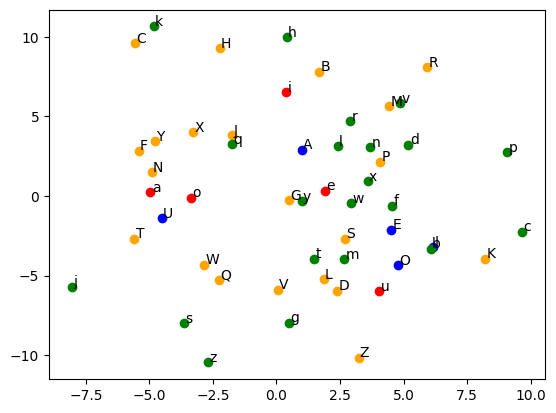

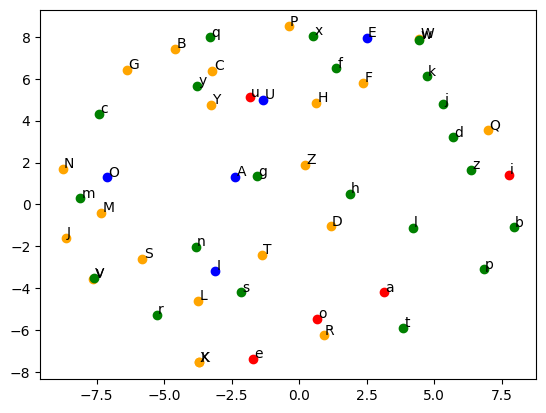

In [ ]:
def plot_emb_2d(emb, itos, ax=None):
    # Compute t-SNE transformation
    tsne = TSNE(n_components=2)
    emb_2d = tsne.fit_transform(emb.cpu().detach().numpy())

    if ax is None:
        fig, ax = plt.subplots()
    for i in range(len(itos)):
        x, y = emb_2d[i]
        if itos[i] in 'aeiou' : color = 'r'
        elif itos[i] in 'AEIOU' : color = 'b'
        elif itos[i] in 'bcdfghjklmnpqrstvwxyz' : color = 'g'
        elif itos[i] in 'bcdfghjklmnpqrstvwxyz'.upper() : color = 'orange'
        else : continue
        ax.scatter(x, y, color = color)
        ax.text(x + 0.05, y + 0.05, itos[i])
    return ax

plot_emb_2d(weights_prev,itos)

plot_emb_2d(state_dict['_orig_mod.emb.weight'],itos)


In [ ]:
# Adjust keys if necessary
adjusted_state_dict = {}
for key, value in state_dict.items():
    adjusted_key = key.replace('_orig_mod.', '')  # Adjust the keys as needed
    adjusted_state_dict[adjusted_key] = value

# Load adjusted state dictionary
your_model.load_state_dict(adjusted_state_dict)


<All keys matched successfully>

In [ ]:

print("Character Prediction App")
print("Enter some text and predict the next k characters.")

text_input = input("Enter text:")
k = int(input("Enter number of characters to predict:"))

next_chars=predict_next_chars(text_input,k,your_model,block_size)
text_input+next_chars

Character Prediction App
Enter some text and predict the next k characters.
Enter text:Hello
Enter number of characters to predict:100


'Hellow.\n\nHUMIdCLEter.\n\nANTONIO:\nWell me, thy forth an assador of us with some more worship drift: if you '